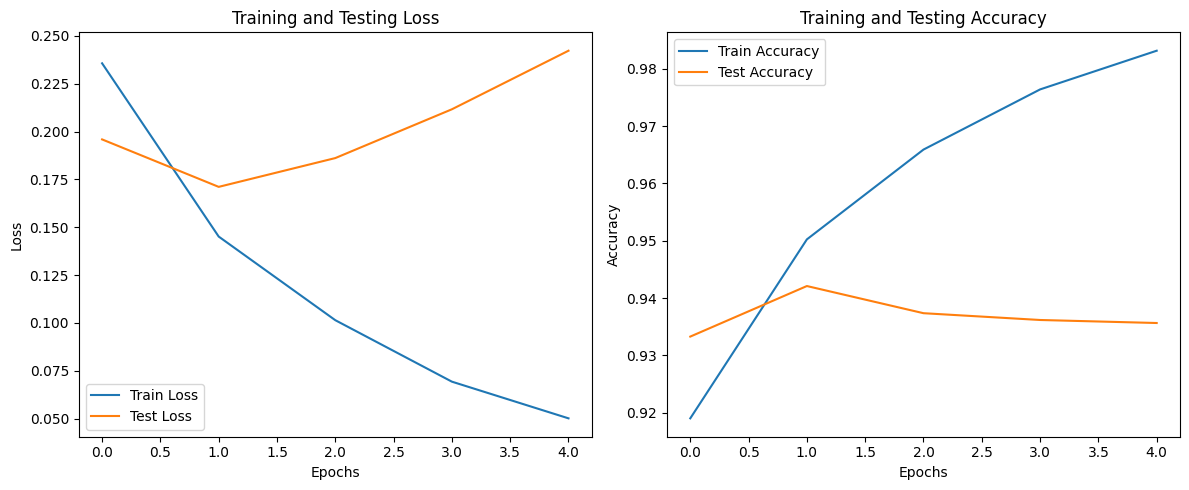

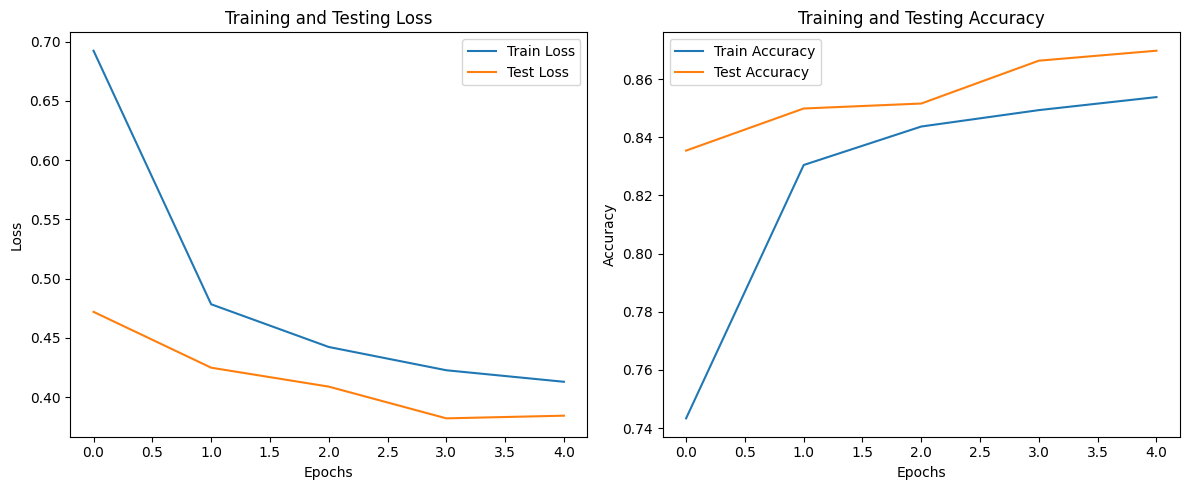

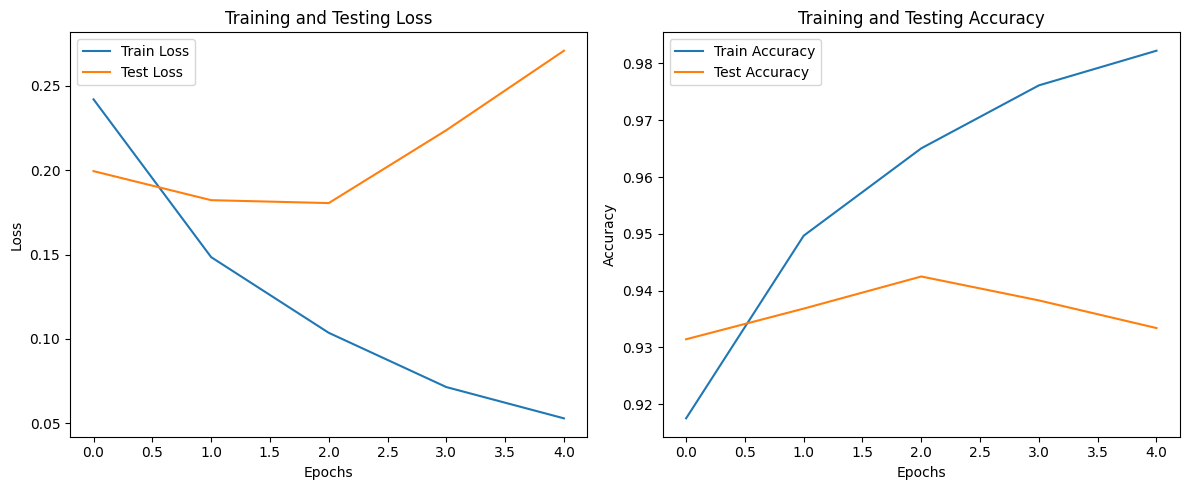

In [4]:
from nlp_moe_model import MoEBertModel, MoETextModel

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt


def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot( train_losses, label='Train Loss')
    plt.plot( test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Testing Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot( train_accuracies, label='Train Accuracy')
    plt.plot( test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_matrix(matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = matrix.max() / 2.
    for i, j in np.ndindex(matrix.shape):
        plt.text(j, i, format(matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
def load_model(path):
    model = torch.load(path)
    return model

def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    label_encoder = LabelEncoder()
    train_df['label_encoded'] = label_encoder.fit_transform(train_df['Class Index'])
    test_df['label_encoded'] = label_encoder.transform(test_df['Class Index'])

    return train_df, test_df, label_encoder
def main():
    model = load_model('best_moe_model.pth')
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    metrics = load_model('training_metrics_soft.txt')

    plot_metrics(
            metrics['train_loss'],
            metrics['test_loss'],
            metrics['train_accuracy'],
            metrics['test_accuracy']
    )
    metrics_freeze = load_model('training_metrics_bert_Freeze.txt')
    plot_metrics(
            metrics_freeze['train_loss'],
            metrics_freeze['test_loss'],
            metrics_freeze['train_accuracy'],
            metrics_freeze['test_accuracy']
    )

    metrics_hard = load_model('training_metrics_hard.txt')
    plot_metrics(
            metrics_hard['train_loss'],
            metrics_hard['test_loss'],
            metrics_hard['train_accuracy'],
            metrics_hard['test_accuracy']
    )

if __name__ == "__main__":
    main()
    # Further evaluation code can be added here
    # maybe